**Table Of Content**
* Part 1: DEA
* Part 2: KMeans Clustering Model
* Part 3: Conclusion and Reccomendations

## Part 1 DEA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes_dataset.csv").drop("Unnamed: 0",axis=1)
df.head(2)

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1


In [3]:
df.shape

(10000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

#### Check Null Values

<Axes: >

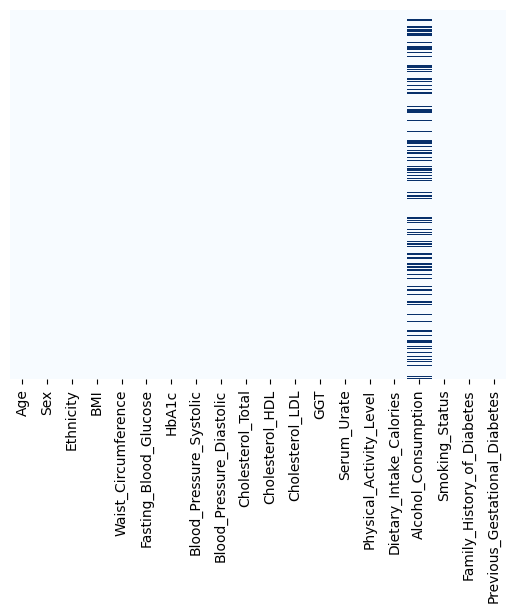

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [6]:
df.Alcohol_Consumption.mode()

0    Moderate
Name: Alcohol_Consumption, dtype: object

In [7]:
#### Fill in null values with mode values, that is the most frquent value
alco_mode=df.Alcohol_Consumption.mode()
df["Alcohol_Consumption"]=df["Alcohol_Consumption"].fillna("Moderate")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [9]:
df.isnull().sum().sum()

np.int64(0)

#### Numericalize binary categorical featur

In [10]:
df["Sex"]=df.Sex.map({"Female":0,"Male":1})

In [11]:
df["Alcohol_Consumption"]=df["Alcohol_Consumption"].map({"Moderate":0,"Heavy":1})

In [12]:
num_feature=df.select_dtypes("number").columns.tolist()
cat_feature=df.select_dtypes("object").columns.tolist()

In [13]:
num_feature

['Age',
 'Sex',
 'BMI',
 'Waist_Circumference',
 'Fasting_Blood_Glucose',
 'HbA1c',
 'Blood_Pressure_Systolic',
 'Blood_Pressure_Diastolic',
 'Cholesterol_Total',
 'Cholesterol_HDL',
 'Cholesterol_LDL',
 'GGT',
 'Serum_Urate',
 'Dietary_Intake_Calories',
 'Alcohol_Consumption',
 'Family_History_of_Diabetes',
 'Previous_Gestational_Diabetes']

In [14]:
cat_feature

['Ethnicity', 'Physical_Activity_Level', 'Smoking_Status']

#### Histogram of numerical featues

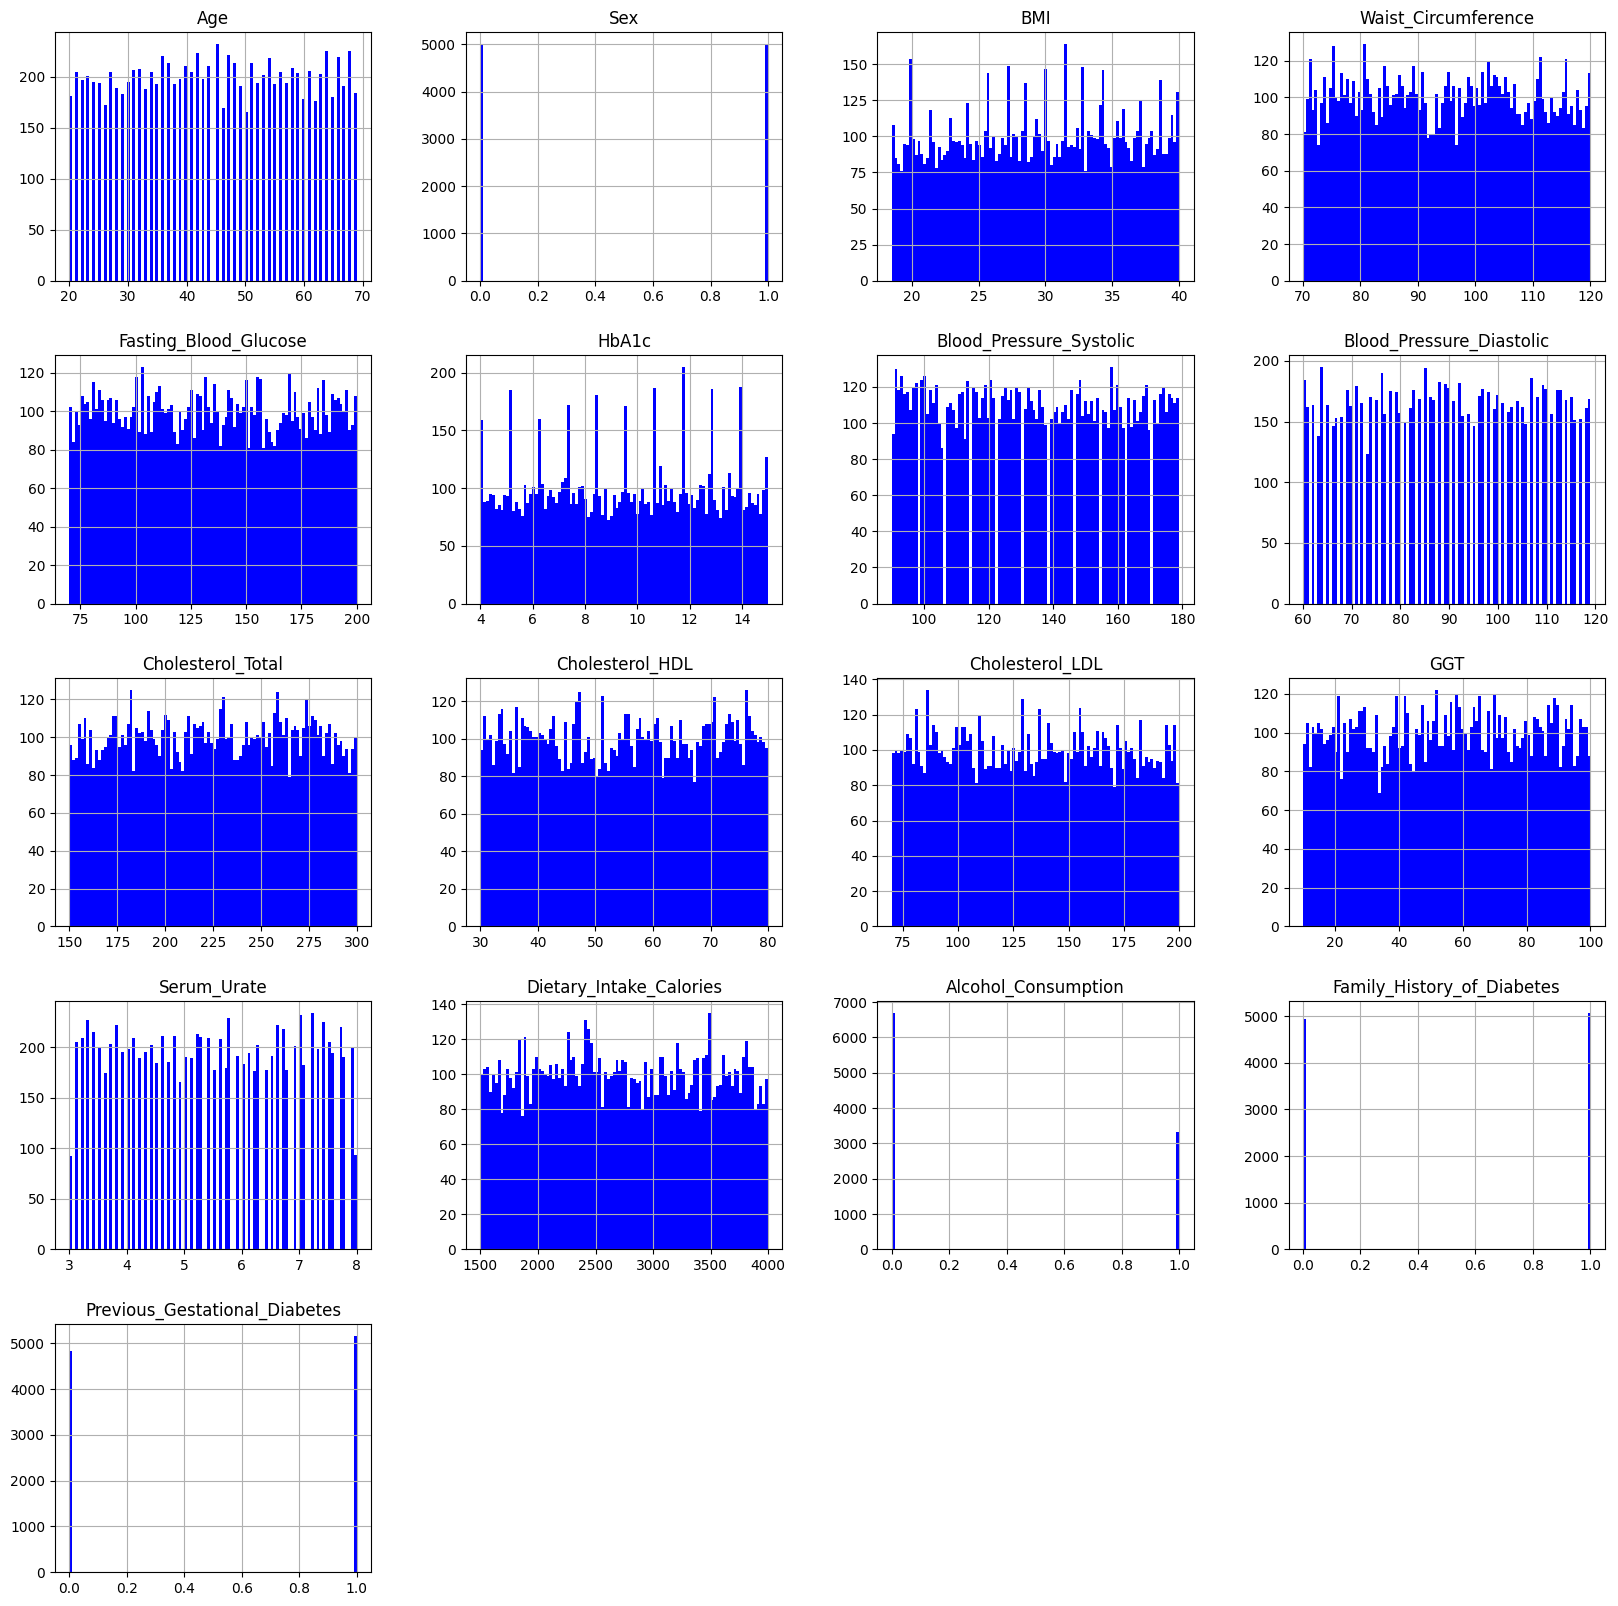

In [15]:
df[num_feature].hist(bins=100,figsize=(20,20),color="blue")
plt.show()

**Observation**
* Most of the features are evenly distributed.
* Alcohol consumption have lots of moderate drinkers and that's because the null values were replaced by mode value-"moderate".
* For BMI and HbAic few values' distribution is clearly higher than others, but still distributed even;y.



<Axes: >

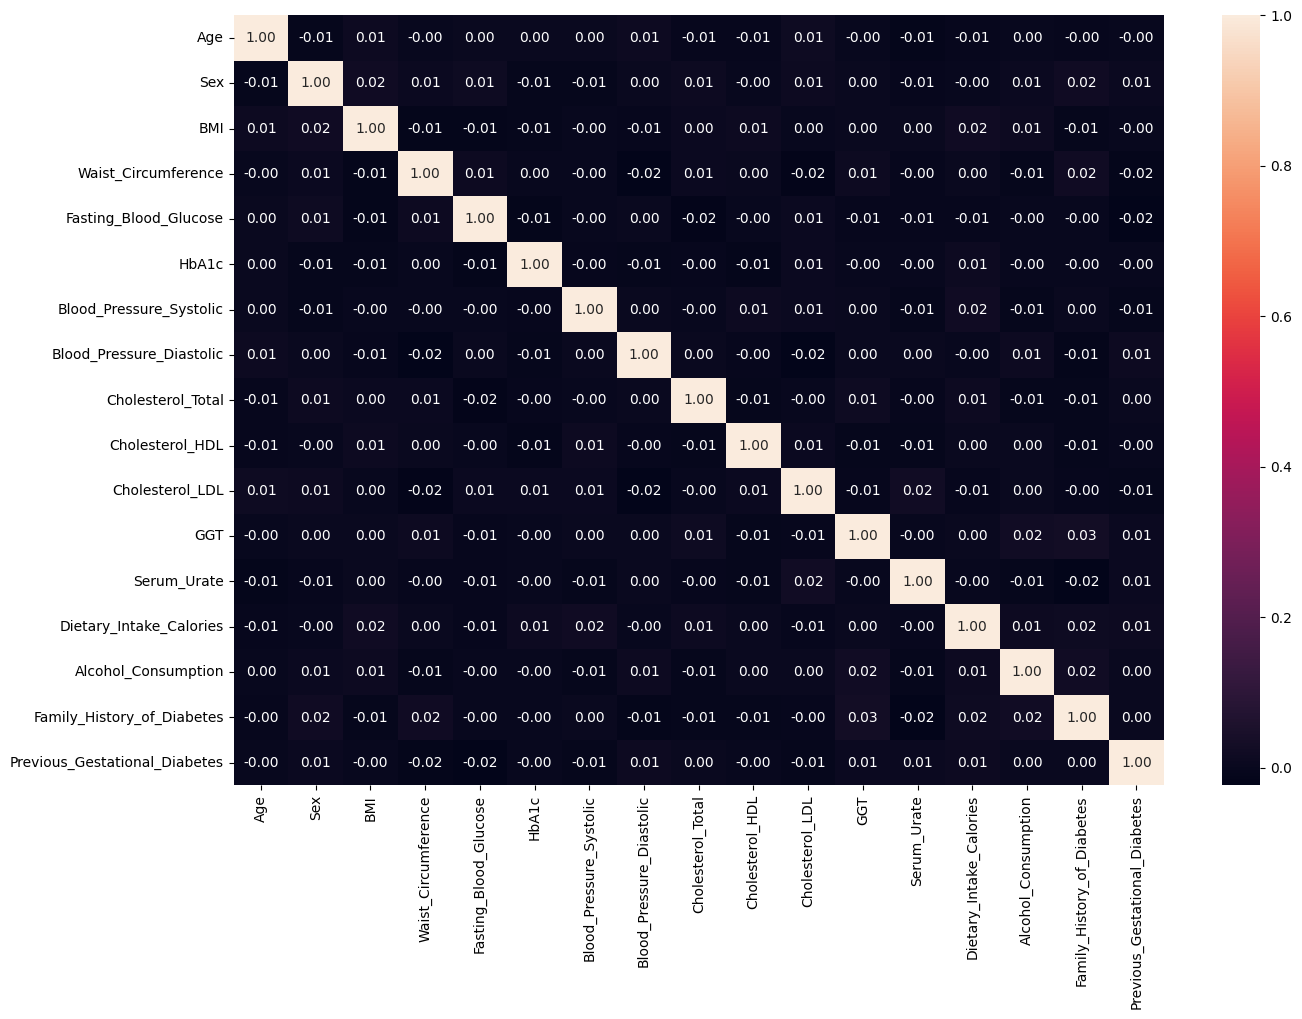

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_feature].corr(),annot=True, fmt="0.2f",)

**Observation**
* All those features are not correlated to each other.

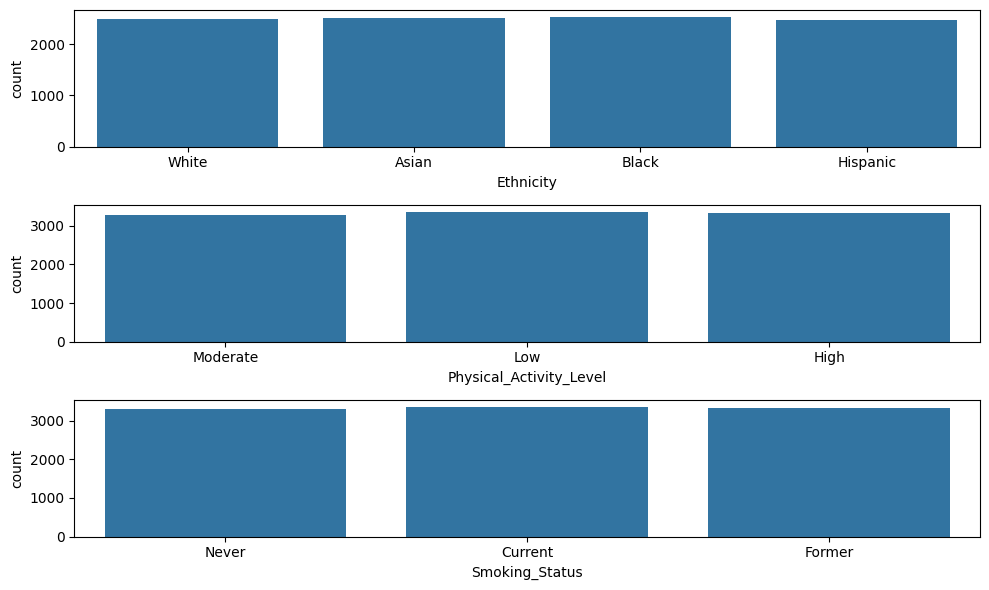

In [17]:
plt.figure(figsize=(10,6))
for num,col in enumerate(cat_feature,1):
    plt.subplot(3,1,num)
    sns.countplot(x=df[col])
plt.tight_layout()    
plt.show()    

**Observation**
* Once again, all those features allocated evenly.

In [18]:
df.columns

Index(['Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [19]:
lst=["BMI", "Waist_Circumference", "Fasting_Blood_Glucose", 
     "HbA1c", "Blood_Pressure_Systolic",'Blood_Pressure_Diastolic', 
     'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 
       'Dietary_Intake_Calories', 
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes' ]

In [20]:
cat_feature

['Ethnicity', 'Physical_Activity_Level', 'Smoking_Status']

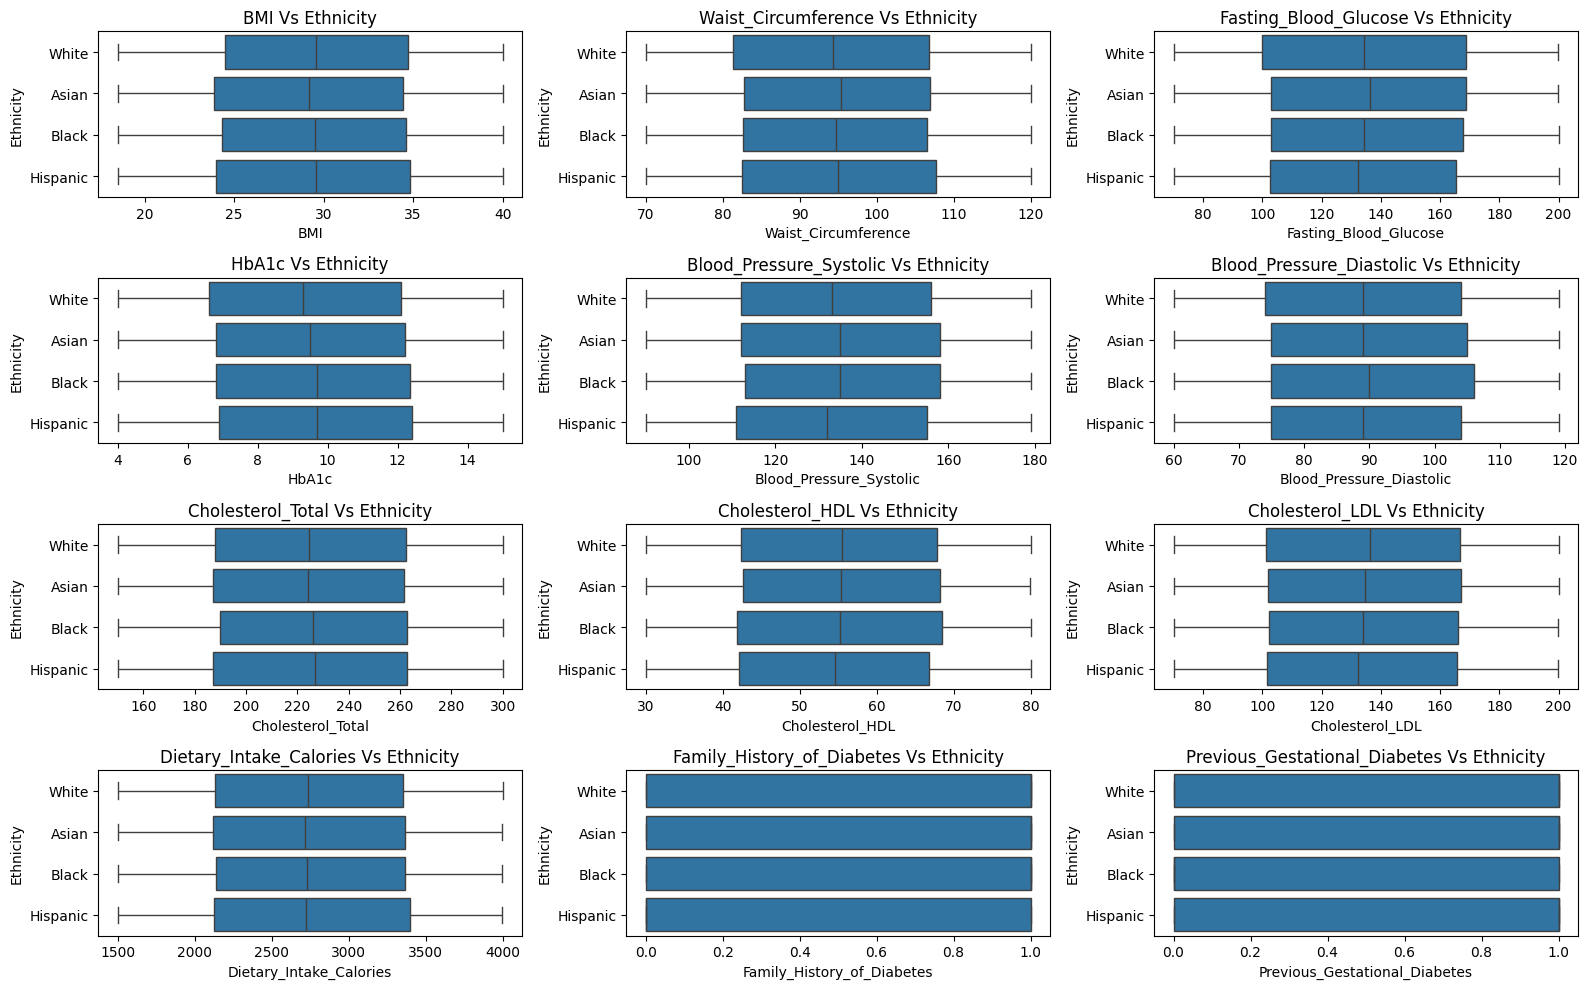

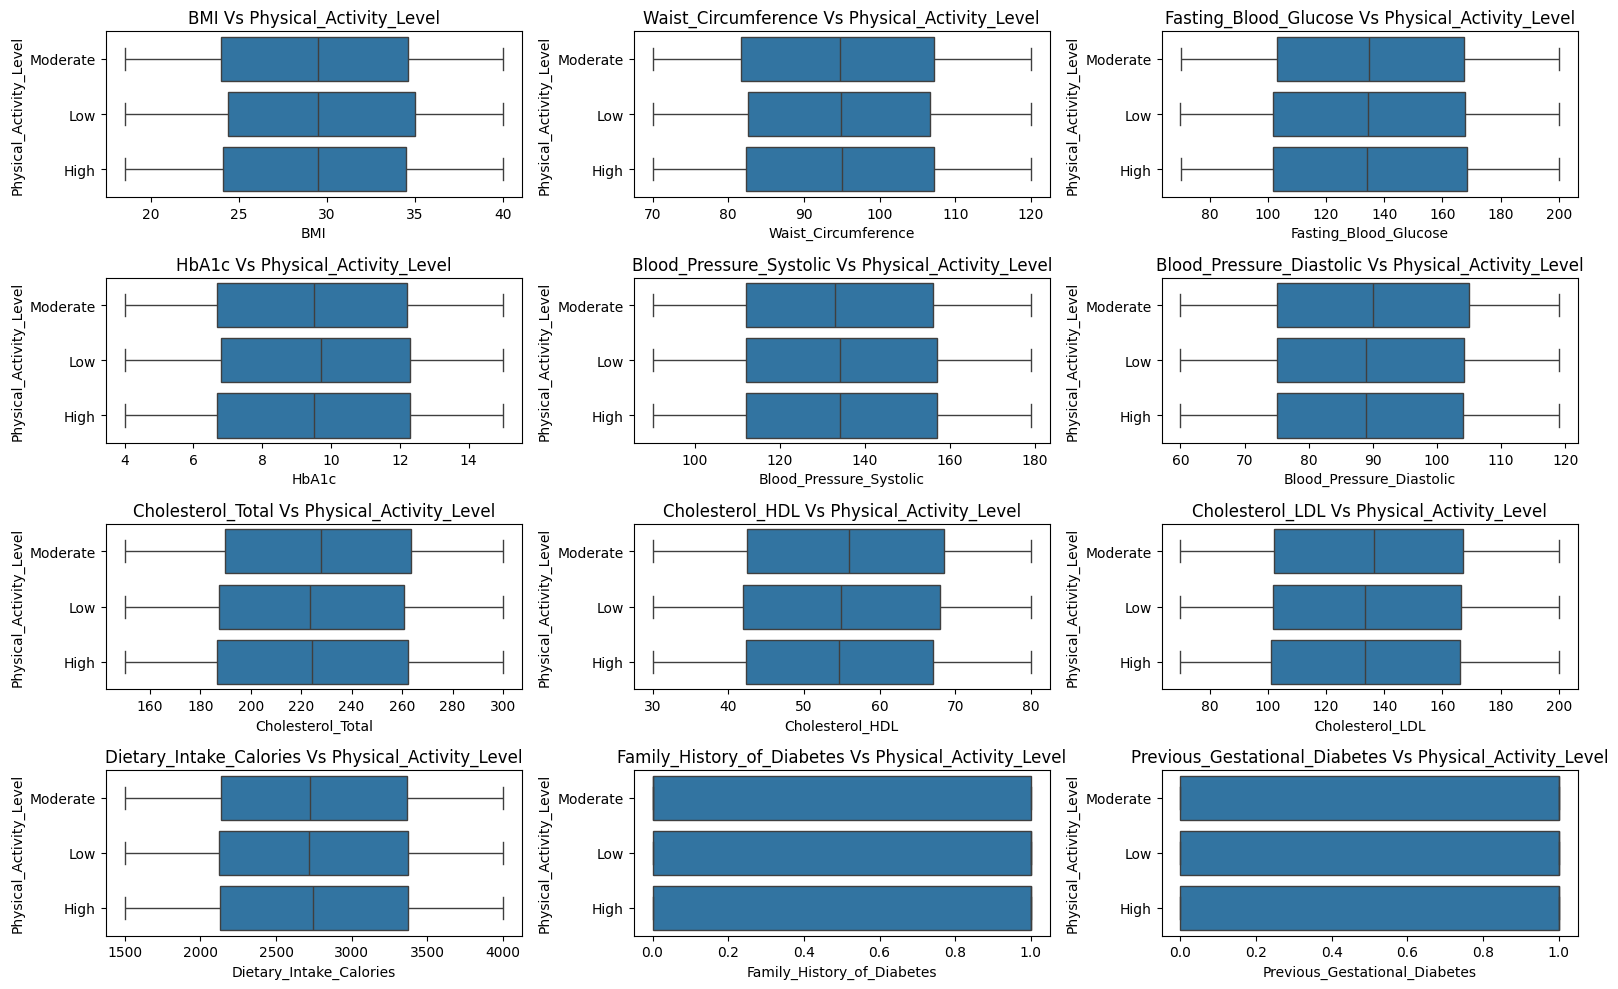

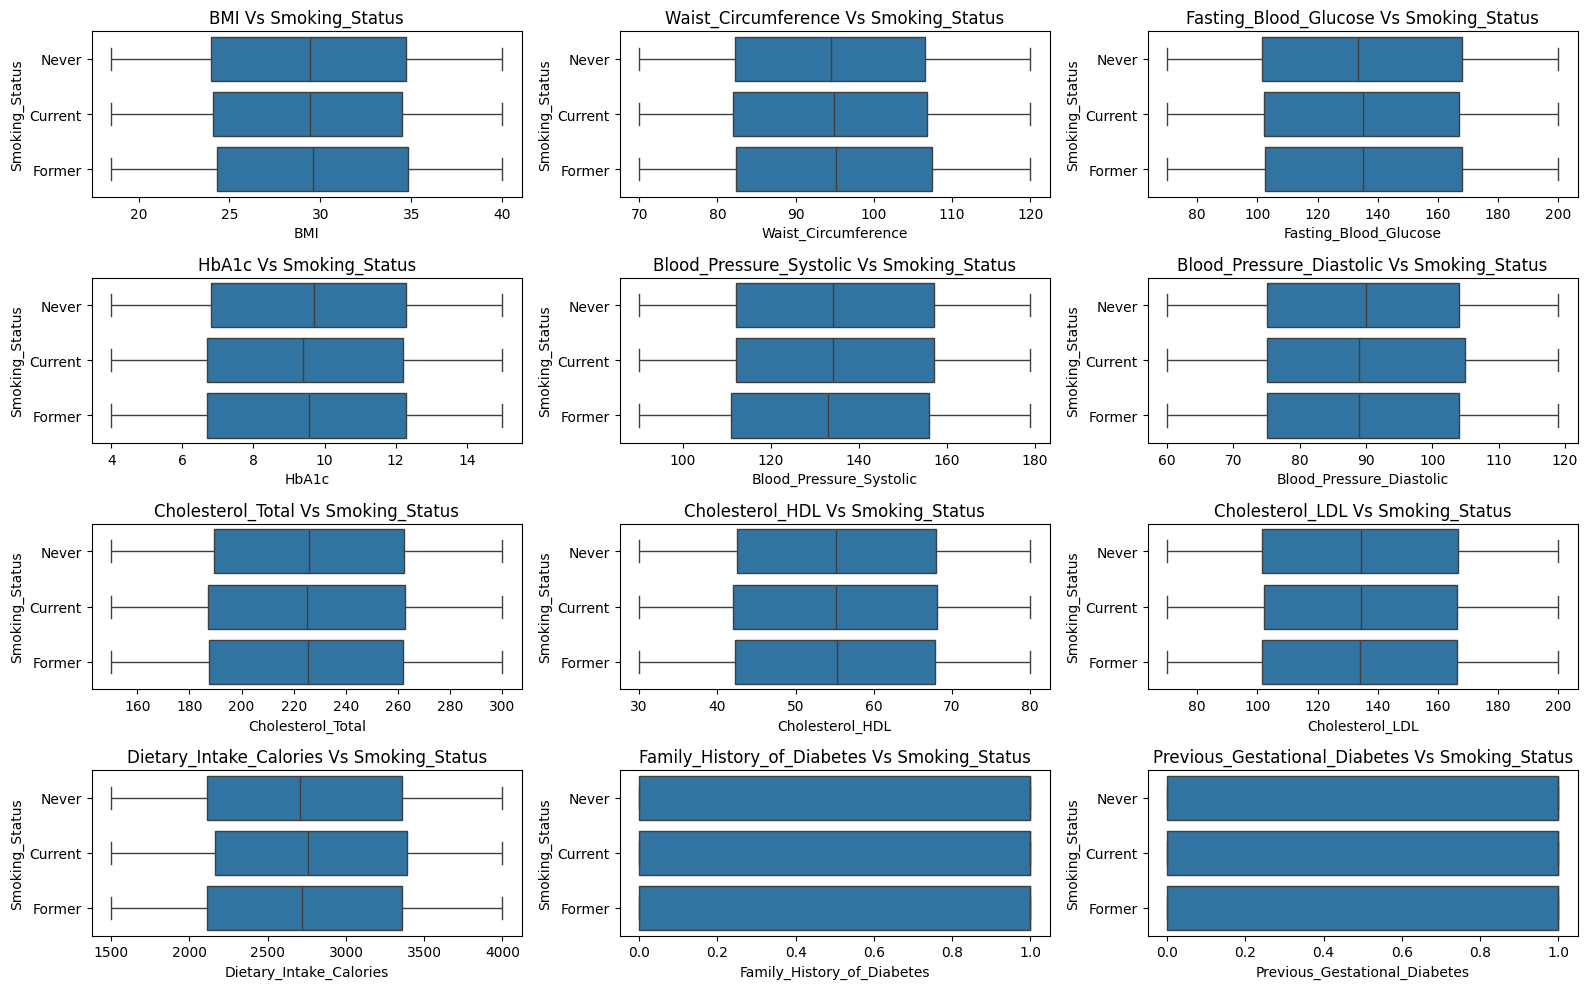

In [21]:
for cat in cat_feature:
    plt.figure(figsize=(16,10))
    for num, col in enumerate(lst,1):
        plt.subplot(4,3,num)
        sns.boxplot(x=df[col],y=df[cat])
        plt.title(f"{col} Vs {cat}")
    
    plt.tight_layout()
    plt.show()    

**Observation**
* Asians have lower BMI. Hispanic have a higher waist circumference.  Hispanics have a higher HbA1c than other ethnicities. Black and Asians have higher blood pressure Systolic. 
* People with low activity level have a higher BMI and lower Cholesterol. 
* Former Smokers have higher cholesterol total level and higher waist circumference. Current smokers have higher blood pressure diastolic. Current Smokers have higher Dietary intake calories


In [22]:
df["Smoking_Status"].value_counts()

Smoking_Status
Current    3364
Former     3330
Never      3306
Name: count, dtype: int64

In [23]:
num_feature

['Age',
 'Sex',
 'BMI',
 'Waist_Circumference',
 'Fasting_Blood_Glucose',
 'HbA1c',
 'Blood_Pressure_Systolic',
 'Blood_Pressure_Diastolic',
 'Cholesterol_Total',
 'Cholesterol_HDL',
 'Cholesterol_LDL',
 'GGT',
 'Serum_Urate',
 'Dietary_Intake_Calories',
 'Alcohol_Consumption',
 'Family_History_of_Diabetes',
 'Previous_Gestational_Diabetes']

In [24]:
df.Smoking_Status.value_counts()

Smoking_Status
Current    3364
Former     3330
Never      3306
Name: count, dtype: int64

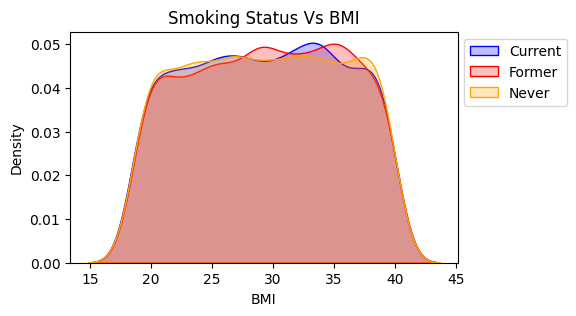

In [113]:
plt.figure(figsize=(5,3))
sns.kdeplot(df.query("Smoking_Status=='Current'")["BMI"], label="Current",fill=True,color="blue")
sns.kdeplot(df.query("Smoking_Status=='Former'")["BMI"], label="Former",fill=True,color="red")
sns.kdeplot(df.query("Smoking_Status=='Never'")["BMI"], label="Never",fill=True,color="orange")
plt.title("Smoking Status Vs BMI")
plt.legend(bbox_to_anchor=(1,1))

**Observation**
* People never smoke tend to have lower BMI comparing the peers.

Text(0.5, 1.0, 'Smoking Status Vs Waist Circumference')

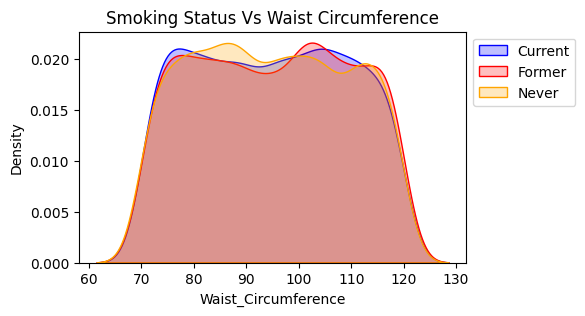

In [114]:
plt.figure(figsize=(5,3))
sns.kdeplot(df.query("Smoking_Status=='Current'")['Waist_Circumference'], label="Current",fill=True,color="blue")
sns.kdeplot(df.query("Smoking_Status=='Former'")['Waist_Circumference'], label="Former",fill=True,color="red")
sns.kdeplot(df.query("Smoking_Status=='Never'")['Waist_Circumference'], label="Never",fill=True,color="orange")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Smoking Status Vs Waist Circumference")

**Observation**
* People who never smoke have smaller waist circumference.

In [27]:
lst=['Blood_Pressure_Systolic',
 'Blood_Pressure_Diastolic',
 'Cholesterol_Total',
 'Cholesterol_HDL',
 'Cholesterol_LDL']

In [28]:
df.Physical_Activity_Level.value_counts()

Physical_Activity_Level
Low         3372
High        3341
Moderate    3287
Name: count, dtype: int64

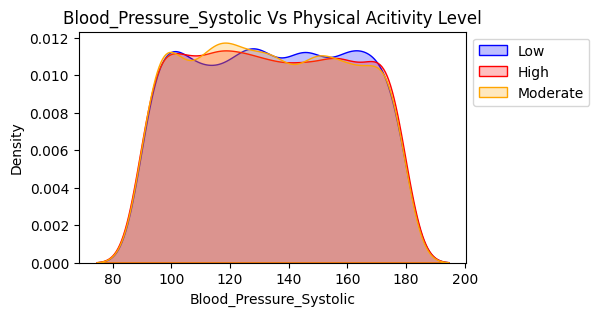

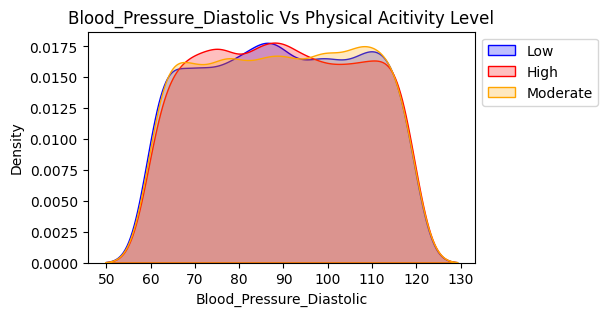

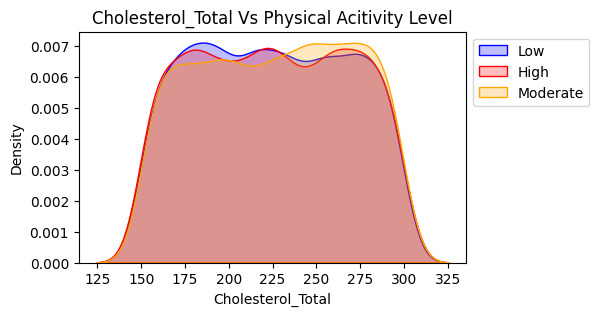

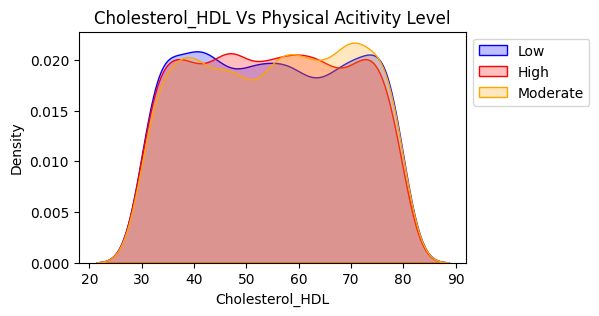

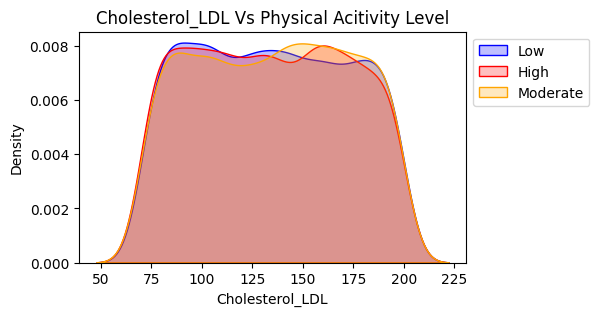

In [109]:
for col in lst:
    plt.figure(figsize=(5,3))    
    sns.kdeplot(df.query("Physical_Activity_Level=='Low'")[col], label="Low",fill=True,color="blue")
    sns.kdeplot(df.query("Physical_Activity_Level=='High'")[col], label="High",fill=True,color="red")
    sns.kdeplot(df.query("Physical_Activity_Level=='Moderate'")[col], label="Moderate",fill=True,color="orange")
    plt.title(f"{col} Vs Physical Acitivity Level")
    plt.legend(bbox_to_anchor=(1,1))

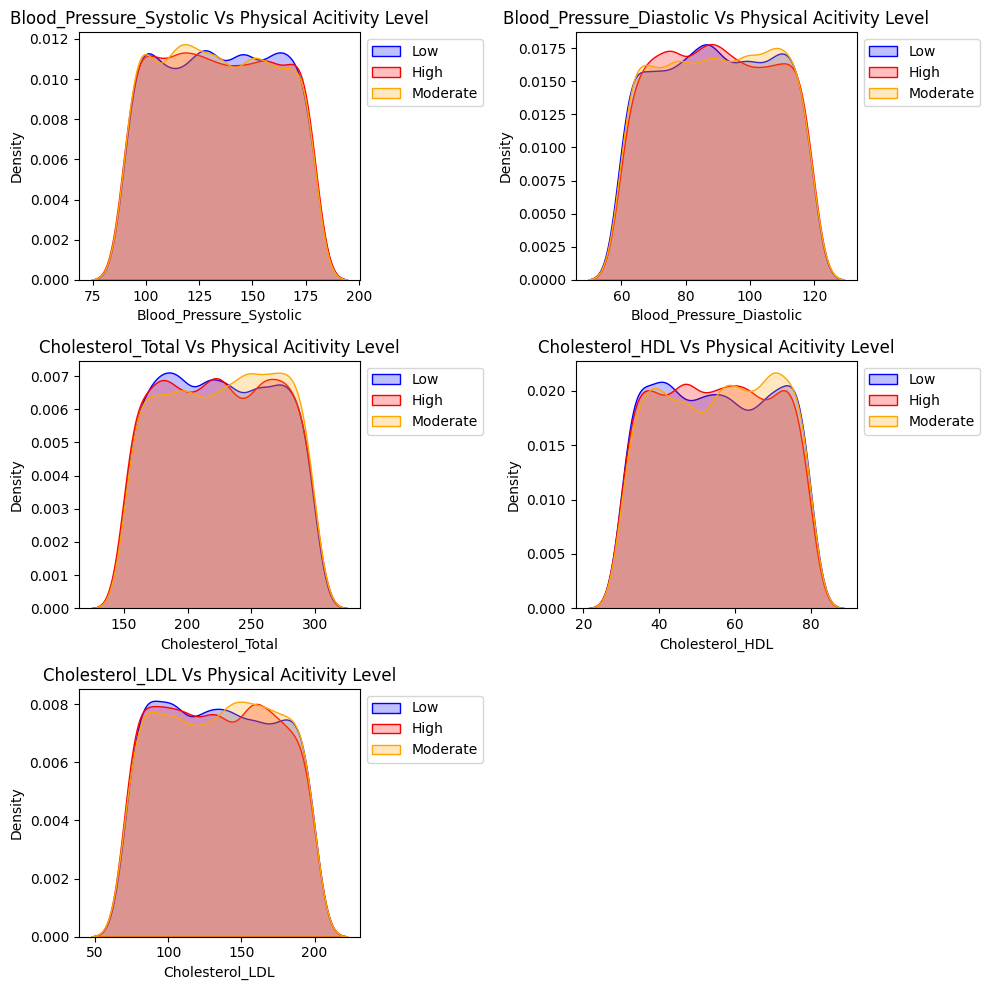

In [120]:
plt.figure(figsize=(10,10)) 
for n,col in enumerate(lst,1):
    plt.subplot(3,2,n)
    sns.kdeplot(df.query("Physical_Activity_Level=='Low'")[col], label="Low",fill=True,color="blue")
    sns.kdeplot(df.query("Physical_Activity_Level=='High'")[col], label="High",fill=True,color="red")
    sns.kdeplot(df.query("Physical_Activity_Level=='Moderate'")[col], label="Moderate",fill=True,color="orange")
    plt.title(f"{col} Vs Physical Acitivity Level")
    plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

**Observation**
* People with high level of activities tend to have low cholesterol and low blood pressures.

#### Part 2: Machine Learning Models -- KMeans Clustering

In [30]:
# kmeans model is not affected by multi-colinearity; therefore there is no need to drop the first category.
obj=pd.get_dummies(df[cat_feature])

In [31]:
dummies_data=pd.concat([df[num_feature],obj],axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_data=std.fit_transform(dummies_data)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_lst=[]
silhouette_scores=[]
for n in range(2,16):
    kmeans=KMeans(n_clusters=n,n_init=10,random_state=42)
    kmeans.fit(scaled_data)
    inertia_lst.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data,kmeans.labels_))

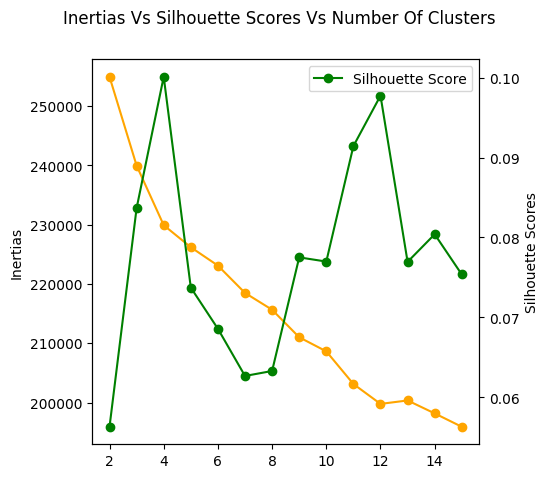

In [33]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(
    range(2,16),
    inertia_lst,
    label="Inertia", 
    c="orange",
    marker="o")
ax.set_ylabel("Inertias")
ax2=ax.twinx()
ax2.plot(
    range(2,16),
    silhouette_scores,
    marker="o",
    label="Silhouette Score",
    color="green")
ax2.set_ylabel("Silhouette Scores")
fig.suptitle("Inertias Vs Silhouette Scores Vs Number Of Clusters")
plt.legend()
plt.show()

Cluster 4 and 12 has the highest silhouette scores. However, I will be running a 4 clusters KMeans Models for practicality.

## k=4

In [34]:
kmeans4=KMeans(n_clusters=4, n_init=10,random_state=42)
kmeans4.fit(scaled_data)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [35]:
from collections import Counter
Counter(kmeans4.labels_)

Counter({np.int32(0): 2539,
         np.int32(3): 2503,
         np.int32(2): 2482,
         np.int32(1): 2476})

In [36]:
centers4=pd.DataFrame(kmeans4.cluster_centers_,columns=dummies_data.columns)
centers4.style.background_gradient(axis=0)

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Alcohol_Consumption,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_High,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Current,Smoking_Status_Former,Smoking_Status_Never
0,0.001532,0.027388,0.002056,-0.006013,0.008865,0.013520,0.040916,0.029738,0.019125,0.003622,0.001654,-0.025259,-0.016298,0.002302,0.027084,0.001361,-0.039717,-0.577812,1.714222,-0.573655,-0.574579,-0.002739,-0.021786,0.024676,0.016572,-0.009600,-0.007027
1,-0.005213,0.002616,0.010987,0.013219,-0.023614,0.029539,-0.039961,-0.003218,0.006778,-0.033084,-0.014032,0.021292,0.002306,0.009161,0.015613,-0.015617,0.033254,-0.577812,-0.583355,1.743207,-0.574579,0.018639,0.001788,-0.020516,-0.029001,0.051840,-0.022807
2,-0.007187,0.024368,0.015641,-0.029224,-0.018602,-0.038465,-0.015035,-0.013036,-0.006657,0.013825,0.003130,-0.010898,0.001021,-0.002580,-0.006678,0.023069,-0.004800,-0.577812,-0.583355,-0.573655,1.740405,-0.008744,0.001764,0.007005,0.008574,-0.024370,0.015802
3,0.010728,-0.054533,-0.028464,0.022001,0.032813,-0.004792,0.012934,-0.014056,-0.019504,0.015344,0.009100,0.015367,0.013239,-0.008839,-0.036297,-0.008807,0.012152,1.730666,-0.583355,-0.573655,-0.574579,-0.006990,0.018582,-0.011683,0.003375,-0.017377,0.014020


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(n_components=2,random_state=42)
pca.fit(scaled_data)

PCA(n_components=2, random_state=42)

In [39]:
pca.explained_variance_ratio_

array([0.05671874, 0.05615237])

In [40]:
cluster4=pd.Series(kmeans4.labels_,name="Cluster4")

In [41]:
pca_df=pd.DataFrame(pca.fit_transform(scaled_data),columns=["PC1","PC2"])
pca_df

,PC1,PC2
0,1.426960,-0.859527
1,-0.323224,-1.943780
2,0.307331,1.790893
3,2.316262,0.269118
4,-0.552761,-1.849161
...,...,...
9995,0.566513,1.964872
9996,2.560394,0.201677
9997,-1.624491,1.438859
9998,0.132435,-0.120013


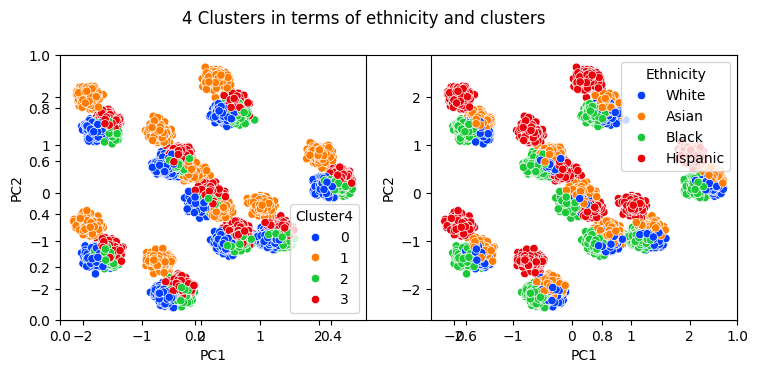

In [42]:
fig,ax=plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
sns.scatterplot(x="PC1",y="PC2",data=pca_df,hue=cluster4,palette="bright")
plt.subplot(122)
sns.scatterplot(x="PC1",y="PC2",data=pca_df,hue=df["Ethnicity"],palette="bright")
fig.suptitle("4 Clusters in terms of ethnicity and clusters")
plt.tight_layout()
plt.show()

**Observation**
* In the centers4, each category of the ethniity are obviously higher at its own category. Make me wonder if it's clustered based on ethnicity. 
* It's very obvious that the cluster was made in terms of ethnicity.
* New KMeans Cluster models needed to retrained without the ethnicity feature.

#### KMeans Cluster Round 2 without the feature Ethnicity

In [43]:
obj=pd.get_dummies(df[cat_feature].drop("Ethnicity",axis=1)).astype("int")
obj.head()

,Physical_Activity_Level_High,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Current,Smoking_Status_Former,Smoking_Status_Never
0,0,0,1,0,0,1
1,0,0,1,1,0,0
2,0,1,0,0,1,0
3,0,1,0,0,0,1
4,0,0,1,1,0,0


In [44]:
data=pd.concat([df[num_feature],obj],axis=1)
data.head(2)

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,...,Dietary_Intake_Calories,Alcohol_Consumption,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Physical_Activity_Level_High,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Current,Smoking_Status_Former,Smoking_Status_Never
0,58,0,35.8,83.4,123.9,10.9,152,114,197.8,50.2,...,1538,0,0,1,0,0,1,0,0,1
1,48,1,24.1,71.4,183.7,12.8,103,91,261.6,62.0,...,2653,0,0,1,0,0,1,1,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_data=std.fit_transform(data)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_lst=[]
silhouette_scores=[]
for n in range(2,16):
    kmeans=KMeans(n_clusters=n,n_init=10,random_state=42)
    kmeans.fit(scaled_data)
    inertia_lst.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data,kmeans.labels_))

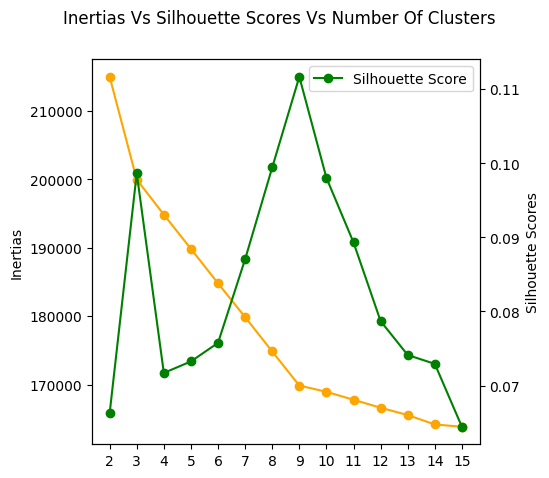

In [46]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(
    range(2,16),
    inertia_lst,
    label="Inertia", 
    c="orange",
    marker="o")
ax.set_ylabel("Inertias")
ax2=ax.twinx()
ax2.plot(
    range(2,16),
    silhouette_scores,
    marker="o",
    label="Silhouette Score",
    color="green")
ax2.set_ylabel("Silhouette Scores")
fig.suptitle("Inertias Vs Silhouette Scores Vs Number Of Clusters")
plt.legend()
plt.xticks(range(2,16))
plt.show()

**Observation**
* Clusters with the highest silhouette scores are cluster 9, 8, and 3.
* Set clusters as 3 and 9 to retain the model.

#### k=3

In [47]:
kmeans3=KMeans(n_clusters=3,n_init=10, random_state=42)
kmeans3.fit(scaled_data)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [48]:
from collections import Counter
Counter(kmeans3.labels_)

Counter({np.int32(2): 3372, np.int32(0): 3341, np.int32(1): 3287})

In [49]:
centers3=pd.DataFrame(kmeans3.cluster_centers_,columns=data.columns)
centers3.style.background_gradient(axis=0)

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Alcohol_Consumption,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Physical_Activity_Level_High,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Current,Smoking_Status_Former,Smoking_Status_Never
0,0.005827,-0.002292,-0.009359,0.011666,0.001281,0.002046,-0.000423,-0.000705,-0.012012,-0.019017,-0.013338,0.009588,0.022204,0.007381,0.010899,0.019225,0.016994,1.411778,-0.713268,-0.699748,0.012092,0.007270,-0.019428
1,-0.024038,0.007389,-0.009735,-0.014715,0.007964,-0.017163,-0.011525,0.006505,0.030835,0.029884,0.018255,-0.004061,-0.004950,-0.000275,0.009046,-0.016740,0.003814,-0.708327,-0.713268,1.429086,-0.001769,-0.000369,0.002146
2,0.017658,-0.004931,0.018763,0.002785,-0.009033,0.014703,0.011654,-0.005642,-0.018157,-0.010288,-0.004579,-0.005542,-0.017175,-0.007045,-0.019617,-0.002731,-0.020556,-0.708327,1.401998,-0.699748,-0.010257,-0.006844,0.017158


**Observation**
* Clearly,  it was clustered by physical activity level.
* Cluster 0: High Level Physical Activity.
* Cluster 1: Moderate Level Physical Activity.
* Cluster 2: Low Level Physical Activity.

In [50]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca3_df=pd.DataFrame(pca.fit_transform(scaled_data),columns=["PC1","PC2"])
print(f"The first two components cover a variance of {pca.explained_variance_ratio_}, a total of {pca.explained_variance_ratio_.sum()}")
df["cluster_3"]=pd.Series(kmeans3.labels_)

df["cluster_3_labels"]=df.cluster_3.map({
    0: "High Level Physical Activity",
    1: "Moderate Level Physical Activity",
    2: "Low Level Physical Activity",
})

The first two components cover a variance of [0.06647619 0.06544574], a total of 0.13192192812494613


In [51]:
component_df=pd.DataFrame(pca.components_,columns=data.columns)
component_df

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,...,Dietary_Intake_Calories,Alcohol_Consumption,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Physical_Activity_Level_High,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Current,Smoking_Status_Former,Smoking_Status_Never
0,-0.012865,-0.020217,-0.016523,0.019223,0.016881,-0.022683,-0.006154,-0.009146,-0.005865,-0.016507,...,0.038459,0.001361,0.022505,-0.002504,0.534344,-0.509474,-0.023803,0.377225,0.150887,-0.530029
1,-0.009870,-0.012007,0.015234,0.032245,0.020689,0.022630,-0.026517,-0.012590,0.005922,-0.011087,...,-0.036542,-0.004522,-0.000060,-0.022899,0.062726,-0.061651,-0.000938,-0.636892,0.753444,-0.115152


In [52]:
component_df.T.style.background_gradient(axis=1)

,0,1
Age,-0.012865,-0.009870
Sex,-0.020217,-0.012007
BMI,-0.016523,0.015234
Waist_Circumference,0.019223,0.032245
Fasting_Blood_Glucose,0.016881,0.020689
HbA1c,-0.022683,0.022630
Blood_Pressure_Systolic,-0.006154,-0.026517
Blood_Pressure_Diastolic,-0.009146,-0.012590
Cholesterol_Total,-0.005865,0.005922
Cholesterol_HDL,-0.016507,-0.011087


**Observation**
* Component 0:  <- Low Physical Activity, more never smokers | High Physical Activity, More Current and former Smokers ->
* Component 1: <-More never and Current smokers | More Former Smokers->


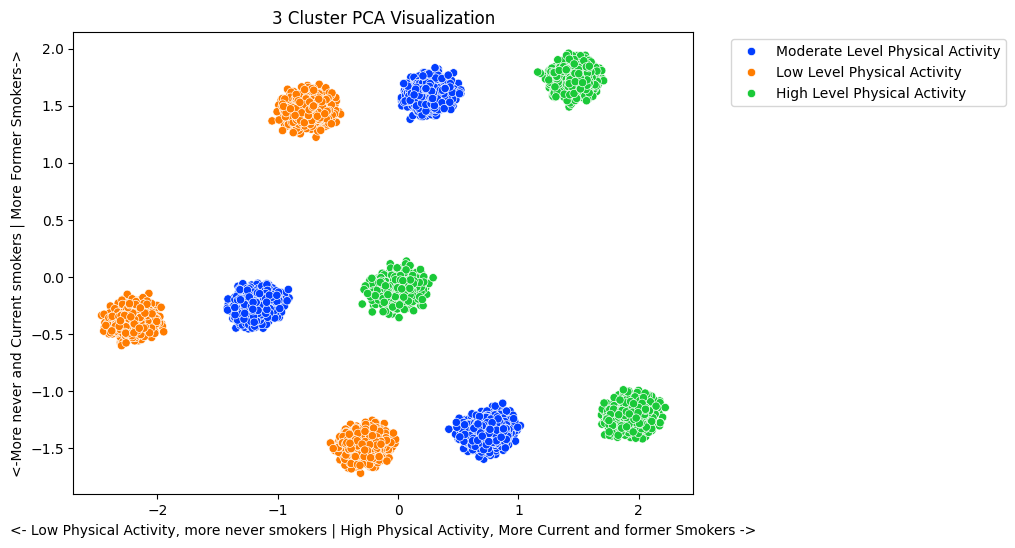

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca3_df,x="PC1",y="PC2",hue=df.cluster_3_labels,palette="bright")
plt.xlabel("<- Low Physical Activity, more never smokers | High Physical Activity, More Current and former Smokers ->")
plt.ylabel("<-More never and Current smokers | More Former Smokers->")
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("3 Cluster PCA Visualization")
plt.show()

**Observation**
* Along the postive direction of X-axis, the data points tend to be high physical activity, more current and former smokers. Along the opposite direction, data points tend to be low physical activity, and more people who never smoked.
* Along the y-axis, the more it goes up, the more former smokers, as it goes down, it has more never and current smokers.
* Since there are 9 clusters. It woukd be better off to retrain the KMeans Models in 9 clusters.

#### k=9

In [54]:
kmeans9=KMeans(n_clusters=9)
kmeans9.fit(scaled_data)
centers9=pd.DataFrame(kmeans9.cluster_centers_,columns=data.columns)
centers9.style.background_gradient(axis=0)

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Alcohol_Consumption,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Physical_Activity_Level_High,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Current,Smoking_Status_Former,Smoking_Status_Never
0,-0.024482,-0.007160,-0.019221,-0.037107,-0.008730,-0.038386,0.000988,0.018291,0.011497,0.025082,0.017153,0.003736,-0.012701,0.034360,0.013948,-0.007654,-0.019411,-0.708327,-0.713268,1.429086,1.404511,-0.706577,-0.702762
1,0.024129,0.040106,0.008662,-0.010698,-0.031258,0.014433,0.010955,0.023279,-0.023482,0.001379,-0.030749,0.011722,-0.056943,-0.042992,0.009556,-0.002827,0.048963,1.411778,-0.713268,-0.699748,-0.711991,-0.706577,1.422956
2,0.024221,0.024256,0.030891,0.001497,0.019079,0.009604,0.041932,-0.022294,-0.012589,0.016237,-0.009997,-0.008124,0.002929,0.038093,-0.075521,-0.014001,-0.016909,-0.708327,1.401998,-0.699748,1.404511,-0.706577,-0.702762
3,-0.023362,0.023018,-0.023340,-0.035798,0.007010,-0.012560,0.003253,-0.019692,0.035170,0.041768,0.021455,-0.005103,0.009497,0.001372,0.069299,-0.048867,0.066119,-0.708327,-0.713268,1.429086,-0.711991,-0.706577,1.422956
4,-0.012426,-0.007897,-0.002855,0.030898,0.051136,0.021696,-0.001363,-0.021625,0.008406,-0.015652,0.005043,0.018729,0.067043,0.038604,-0.012683,0.026928,-0.013434,1.411778,-0.713268,-0.699748,-0.711991,1.415275,-0.702762
5,0.011203,0.004503,-0.003466,0.004813,-0.013225,0.030084,-0.007108,0.033883,0.009664,-0.016763,0.016784,-0.028086,-0.043642,-0.021633,-0.019840,0.035040,-0.022504,-0.708327,1.401998,-0.699748,-0.711991,-0.706577,1.422956
6,0.006581,-0.036620,-0.032688,0.013769,-0.017169,-0.028917,-0.010190,-0.002670,-0.021312,-0.041492,-0.015054,-0.001405,0.052480,0.024009,0.035351,0.032372,0.016878,1.411778,-0.713268,-0.699748,1.404511,-0.706577,-0.702762
7,0.017688,-0.043964,0.029398,0.001998,-0.032991,0.004034,0.000481,-0.029491,-0.052326,-0.030307,-0.021071,0.020207,-0.010207,-0.037445,0.036818,-0.030190,-0.022221,-0.708327,1.401998,-0.699748,-0.711991,1.415275,-0.702762
8,-0.024263,0.006484,0.013383,0.028867,0.025746,-0.000350,-0.038864,0.020723,0.046013,0.022885,0.016177,-0.010883,-0.011529,-0.036836,-0.055929,0.006110,-0.034847,-0.708327,-0.713268,1.429086,-0.711991,1.415275,-0.702762


In [55]:
from collections import Counter
Counter(kmeans9.labels_)

Counter({np.int32(6): 1143,
         np.int32(5): 1142,
         np.int32(4): 1124,
         np.int32(2): 1118,
         np.int32(7): 1112,
         np.int32(0): 1103,
         np.int32(8): 1094,
         np.int32(3): 1090,
         np.int32(1): 1074})

**Observations**
* Cluster 0: Moderate Physical, Current Smoker
* Cluster 1: High Physical, Never Smoker
* Cluster 2: Low Physical, Current Smoker
* Cluster 3: Moderate Physical, Never Smoker
* Cluster 4: High Physical, Former Smoker
* Cluster 5: Low Physical, Never Smoker	 
* Cluster 6: High Physical, Current Smoker
* Cluster 7: Low Physical, Former Smoker
* Cluster 8: Moderate Physical, Former Smoker



In [56]:
df["cluster9"]=pd.Series(kmeans9.labels_)

In [61]:
df["cluster9_labels"]=df.cluster9.map({
    0: "0. Moderate Physical, Current Smoker",
    1: "1. High Physical, Never Smoker",
    2: "2. Low Physical, Current Smoker",
    3: "3. Moderate Physical, Never Smoker",
    4: "4. High Physical, Former Smoker",
    5: "5. Low Physical, Never Smoker",
    6: "6. High Physical, Current Smoker",
    7: "7. Low Physical, Former Smoker",
    8: "8. Moderate Physical, Former Smoker"
})

#### 9 Clusters PCA Visualization

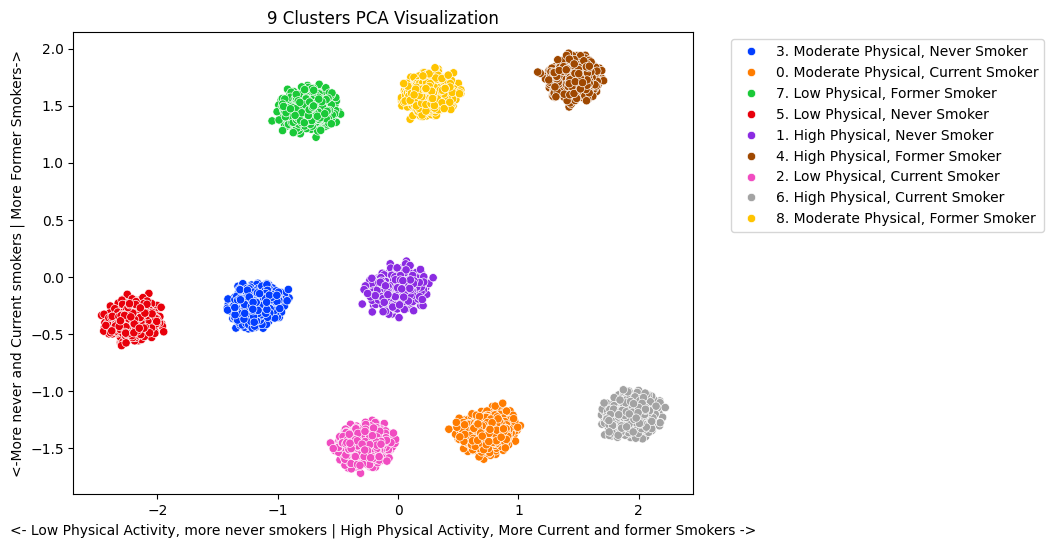

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca3_df,x="PC1",y="PC2",hue=df.cluster9_labels,palette="bright")
plt.xlabel("<- Low Physical Activity, more never smokers | High Physical Activity, More Current and former Smokers ->")
plt.ylabel("<-More never and Current smokers | More Former Smokers->")
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("9 Clusters PCA Visualization")
plt.show()

**Observation**
* This makes total sense. The datasets are clustered by physical activity level and smoking status.
* All those clusters mattched perfectly with the axis descriptions. 

## Histogram for each cluster and each feature

<Figure size 640x480 with 0 Axes>

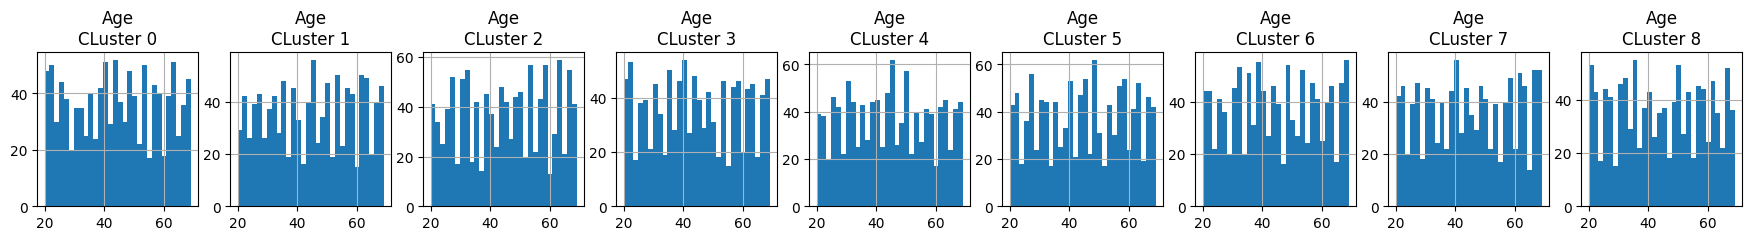

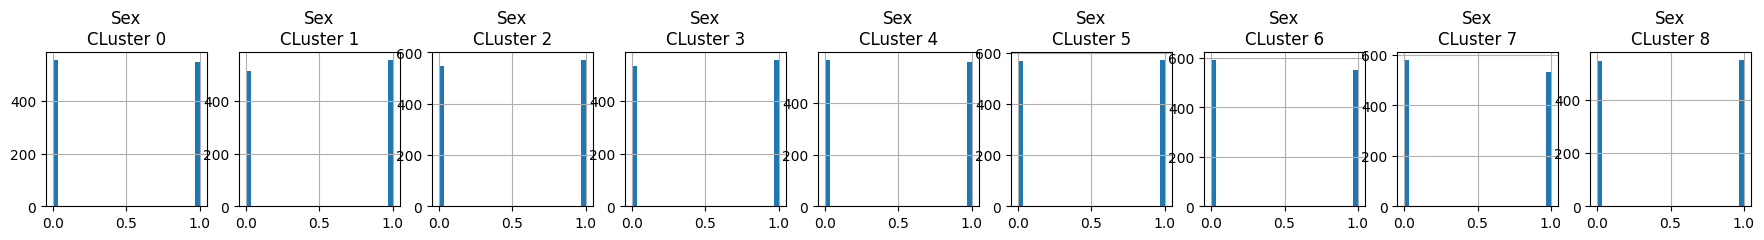

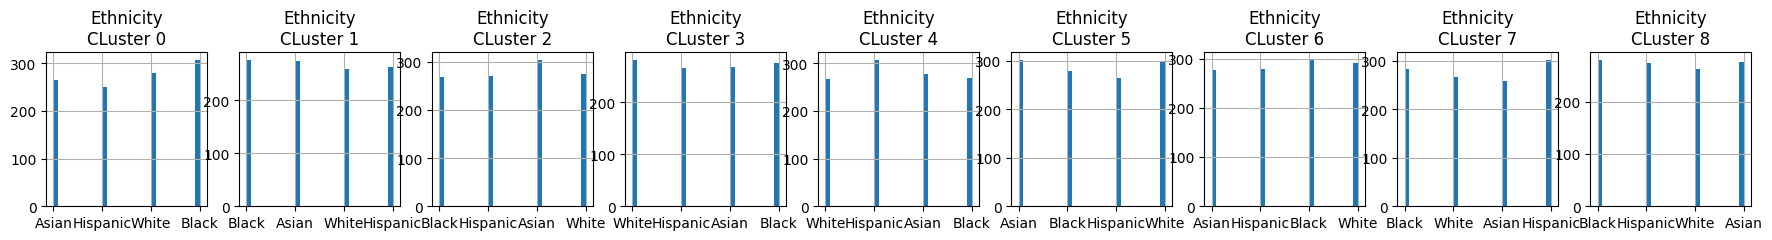

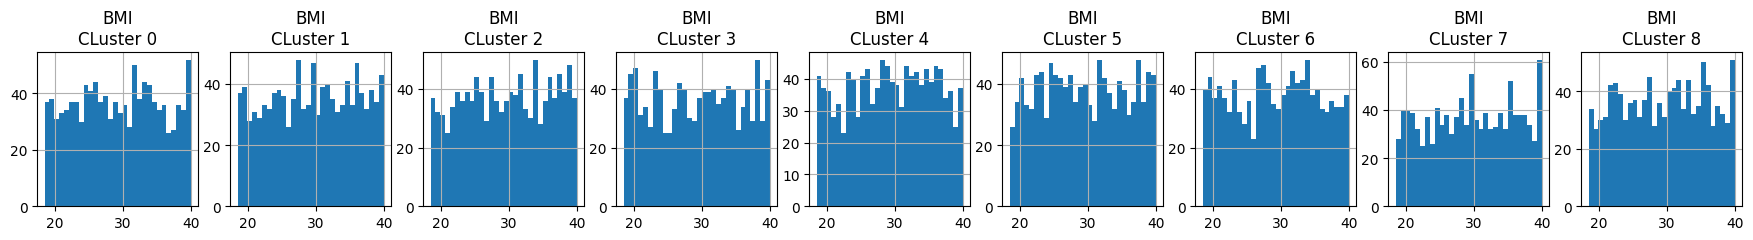

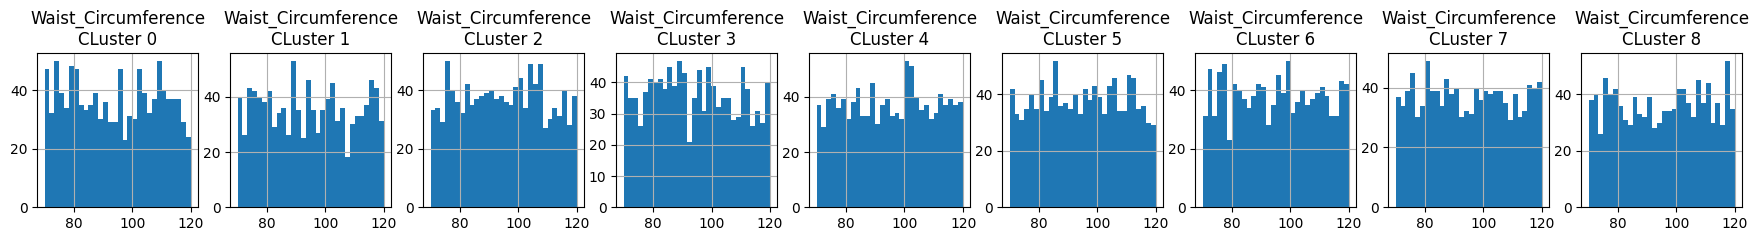

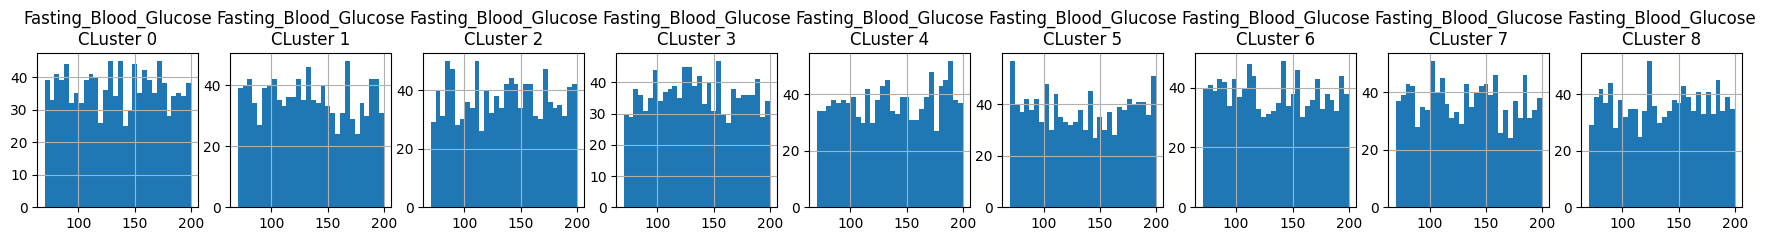

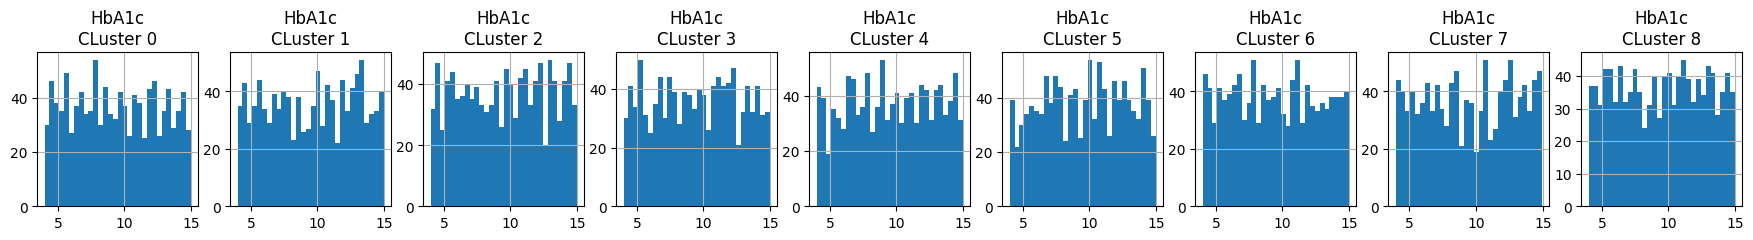

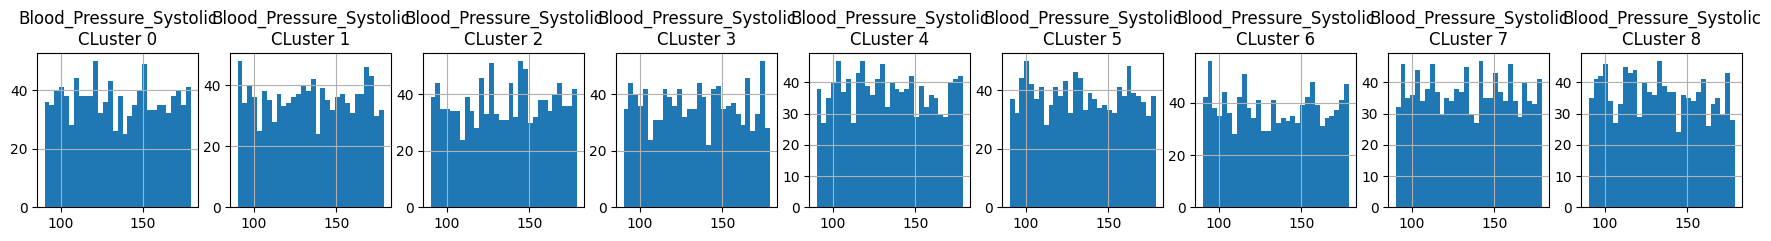

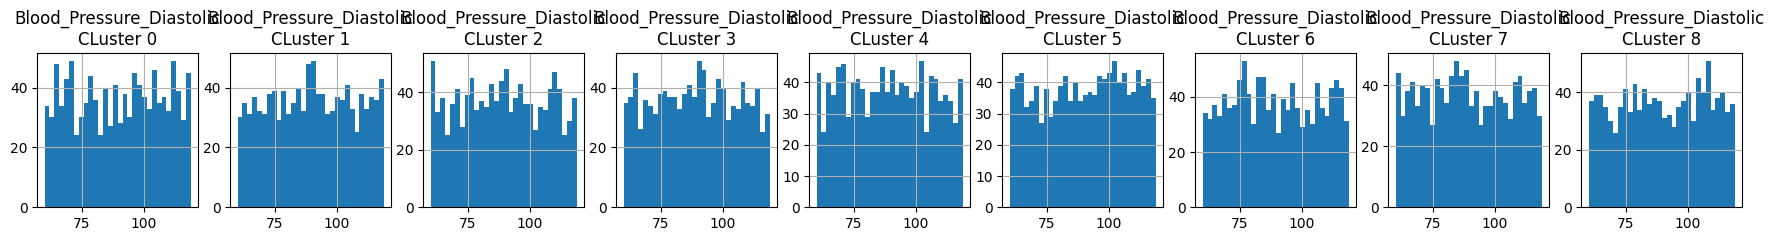

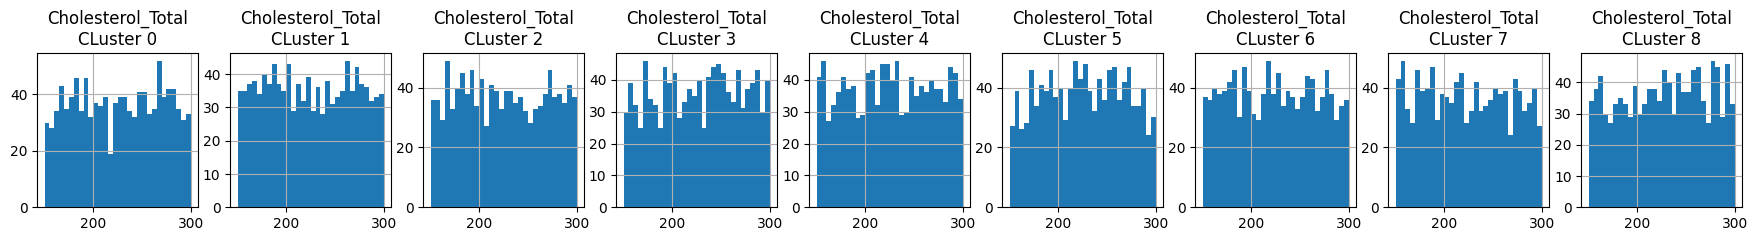

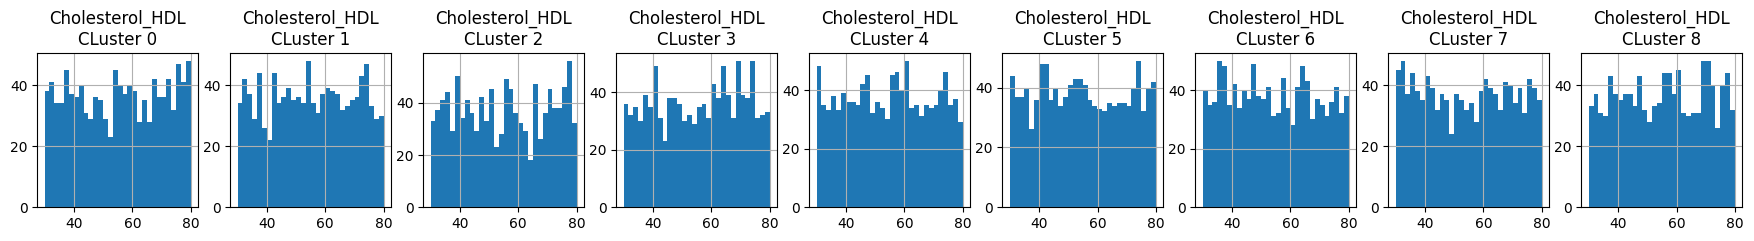

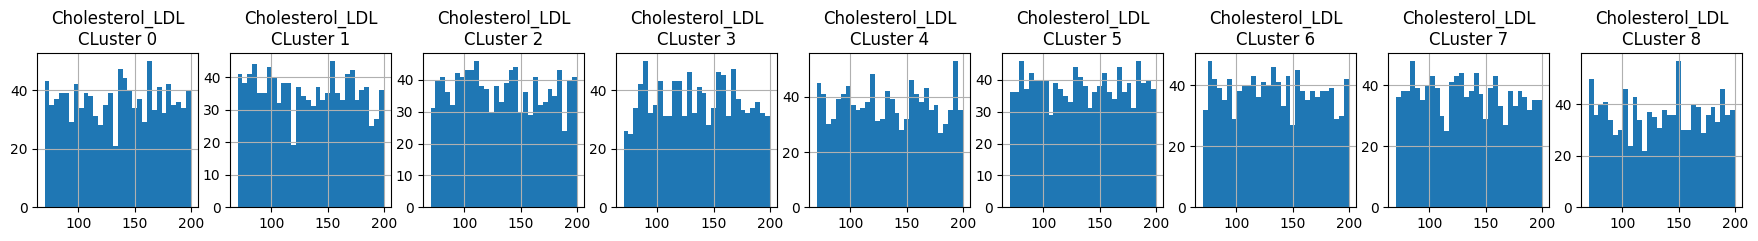

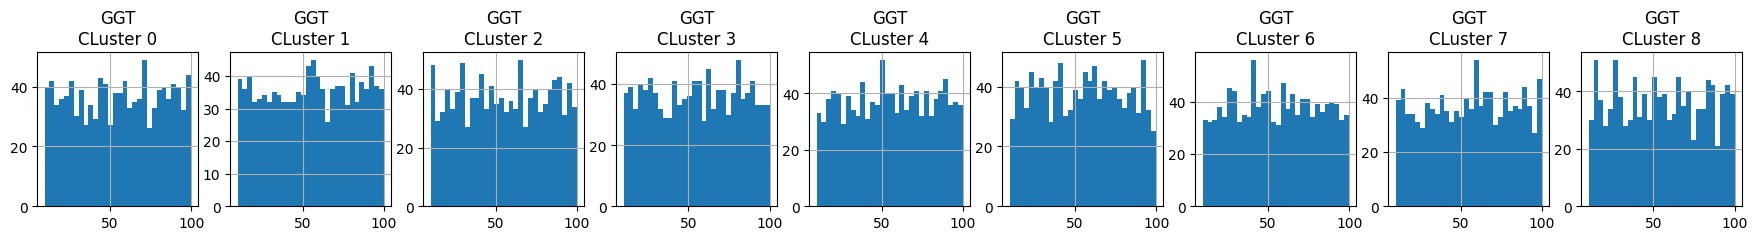

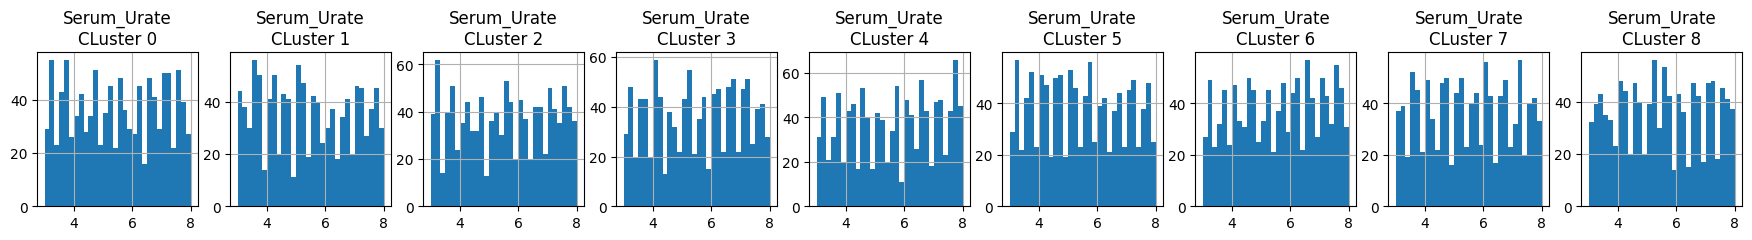

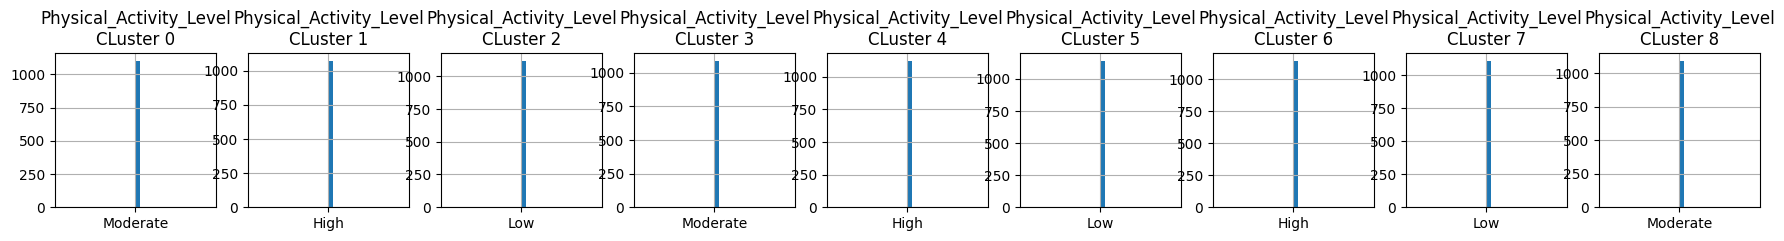

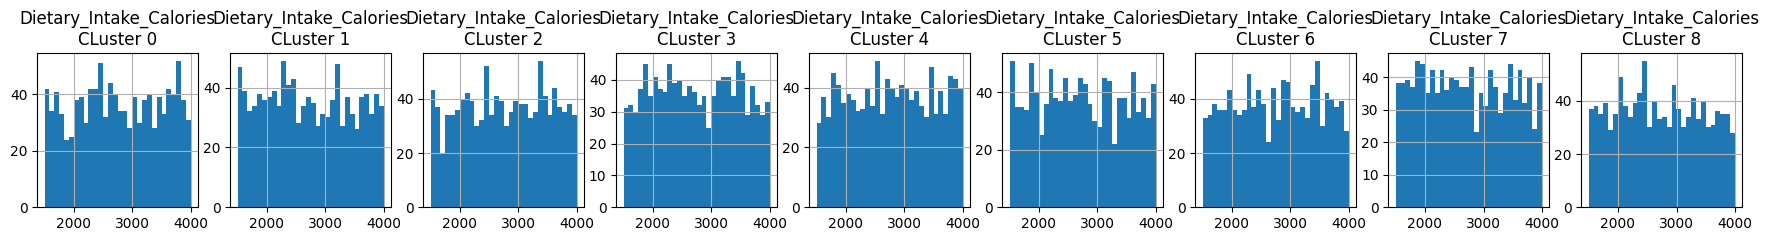

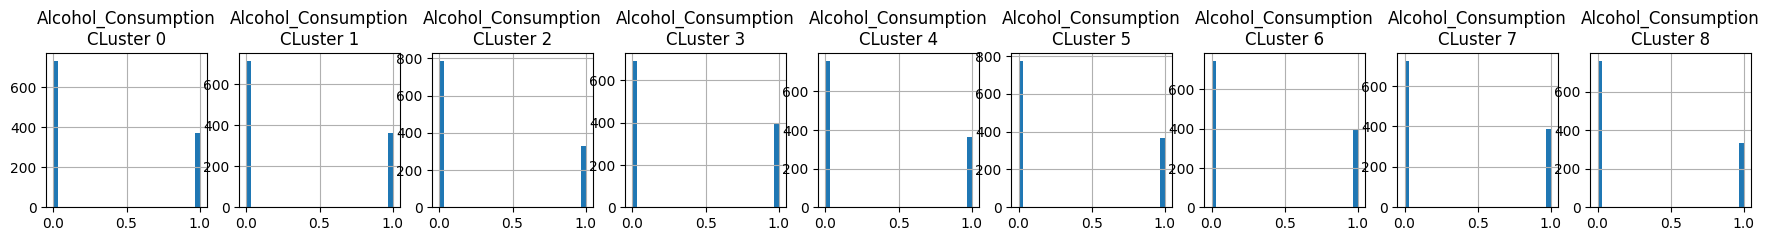

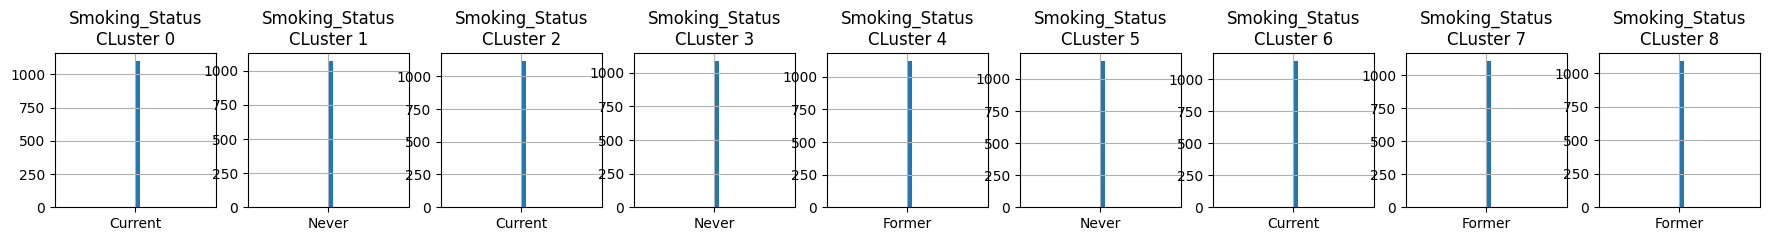

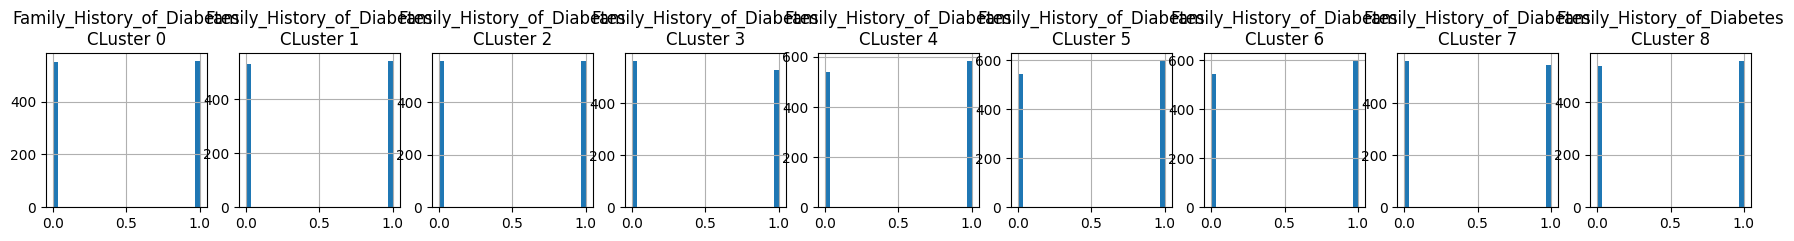

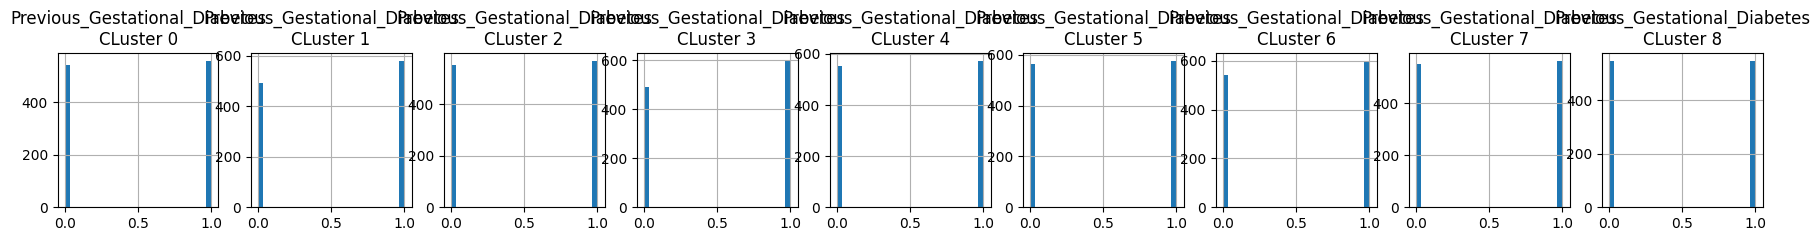

In [60]:
for col in df.drop(['cluster_3', 'cluster_3_labels', 'cluster9', 'cluster9_labels'],axis=1).columns:
    plt.figure(figsize=(22,2))
    for n in range(9):
        plt.subplot(1,9,n+1)
        cluster=df.query("cluster9==@n")
        cluster[col].hist(bins=30)
        plt.title(f"{col}\nCLuster {n}")
    plt.show()

#### DEA of the new clusters

In [69]:
df.groupby("cluster9_labels")[num].mean()

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Alcohol_Consumption,Family_History_of_Diabetes,Previous_Gestational_Diabetes,cluster9
cluster9_labels,,,,,,,,,,,,,,,,,,
"0. Moderate Physical, Current Smoker",44.269266,0.495920,29.299547,94.263373,134.447688,9.385585,134.189483,89.873980,225.659474,55.383953,134.997008,55.264914,5.484950,2767.104261,0.337262,0.503173,0.506800,0.0
"1. High Physical, Never Smoker",44.966480,0.519553,29.471601,94.643203,133.599907,9.553352,134.449721,89.959963,224.156704,55.039385,133.200652,55.471601,5.420577,2711.673184,0.335196,0.505587,0.540968,1.0
"2. Low Physical, Current Smoker",44.967800,0.511628,29.608766,94.818605,135.494186,9.538014,135.258497,89.174419,224.624687,55.255367,133.978891,54.957961,5.507692,2769.779964,0.295170,0.500000,0.508050,2.0
"3. Moderate Physical, Never Smoker",44.285321,0.511009,29.274128,94.282202,135.040000,9.467615,134.248624,89.219266,226.676514,55.626514,135.158349,55.036147,5.517248,2743.465138,0.363303,0.482569,0.549541,3.0
"4. High Physical, Former Smoker",44.442171,0.495552,29.400534,95.241459,136.700534,9.576423,134.128114,89.185943,225.526690,54.791815,134.542883,55.652936,5.600979,2770.145907,0.324733,0.520463,0.509786,4.0
"5. Low Physical, Never Smoker",44.781086,0.501751,29.396760,94.866287,134.278546,9.603065,133.978109,90.142732,225.580736,54.775657,134.983187,54.441331,5.439930,2726.979860,0.321366,0.524518,0.505254,5.0
"6. High Physical, Current Smoker",44.714786,0.481190,29.216448,94.995101,134.130096,9.415661,133.897638,89.512686,224.249956,54.416185,133.789239,55.131846,5.579790,2759.686789,0.347332,0.523185,0.524934,6.0
"7. Low Physical, Former Smoker",44.874101,0.477518,29.599550,94.825809,133.534712,9.520324,134.176259,89.050360,222.917536,54.578777,133.563579,55.691187,5.488579,2715.648381,0.348022,0.491906,0.505396,7.0
"8. Moderate Physical, Former Smoker",44.272395,0.502742,29.500731,95.212249,135.745064,9.506399,133.148995,89.915905,227.142322,55.352011,134.960420,54.886563,5.486654,2716.085009,0.304388,0.510055,0.499086,8.0


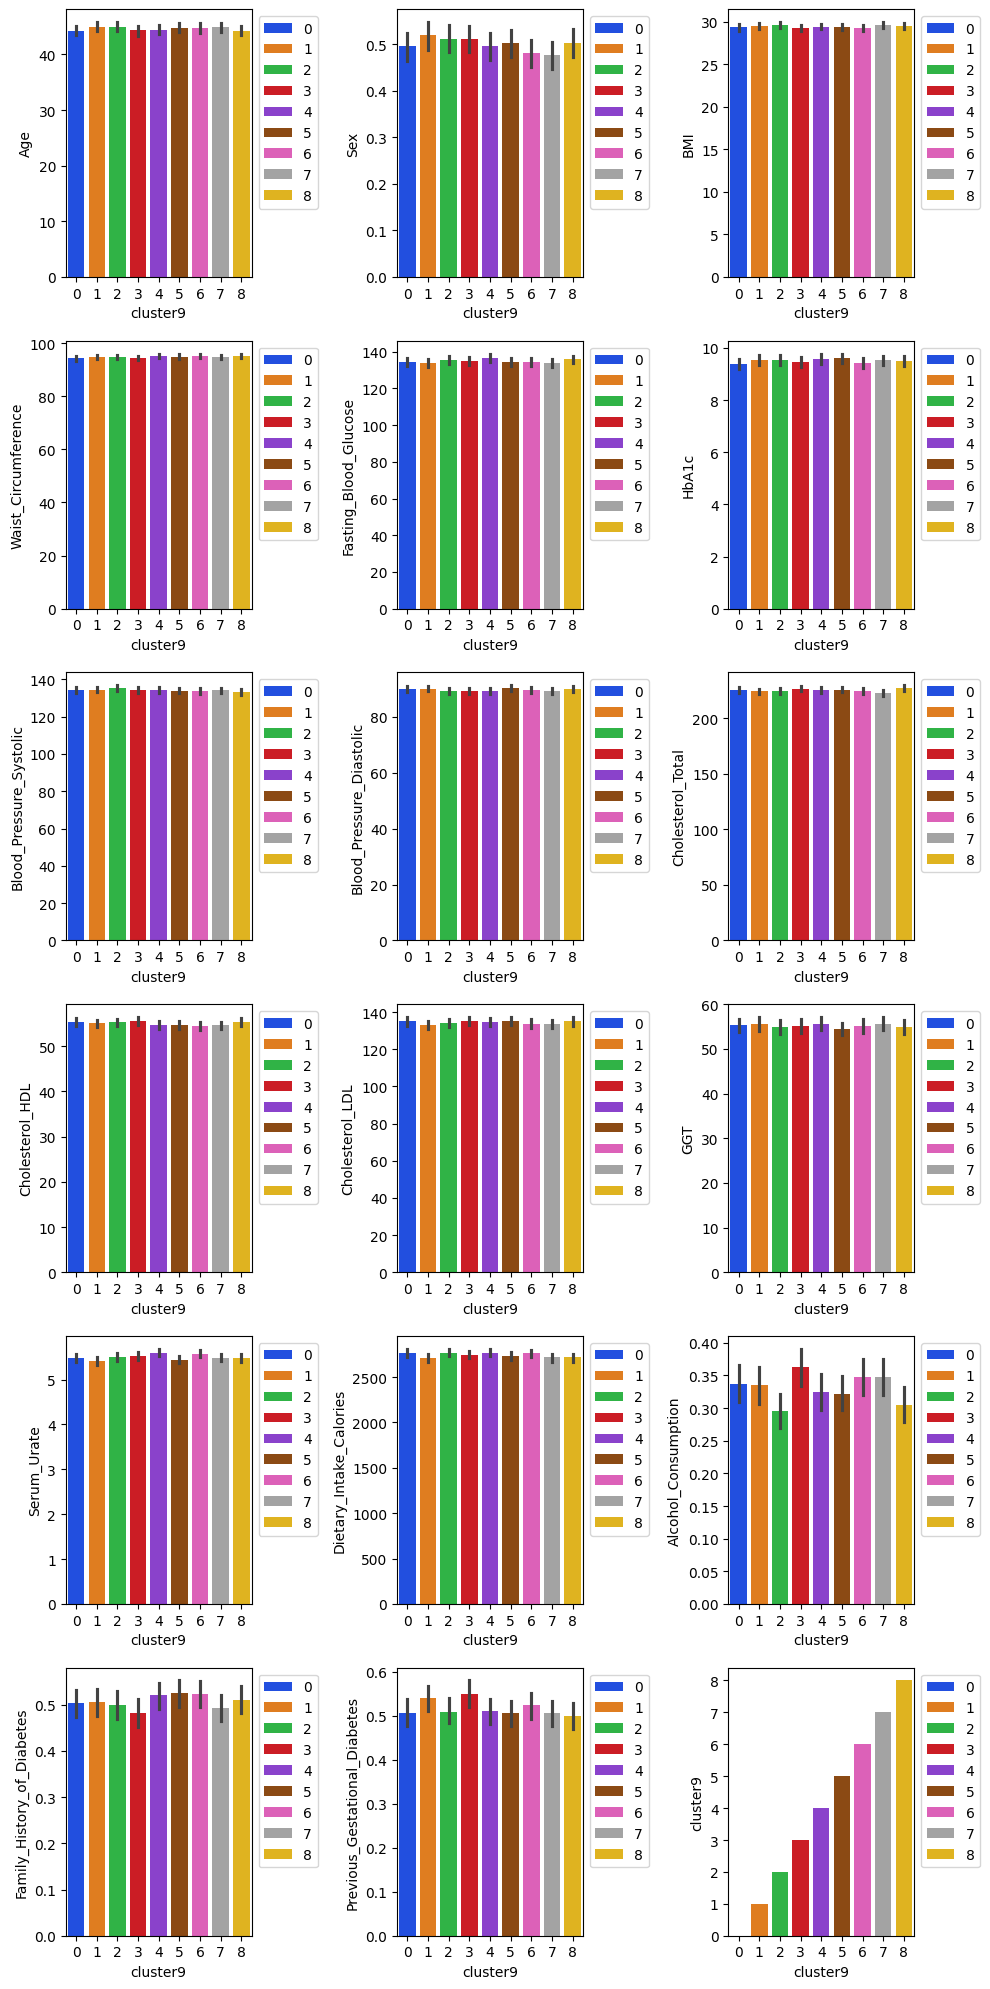

In [88]:
plt.figure(figsize=(10,20))
for n,col in enumerate(num,1):
    plt.subplot(6,3,n)
    sns.barplot(data=df,x="cluster9",y=col,hue="cluster9",palette="bright")
    plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()    
plt.show()

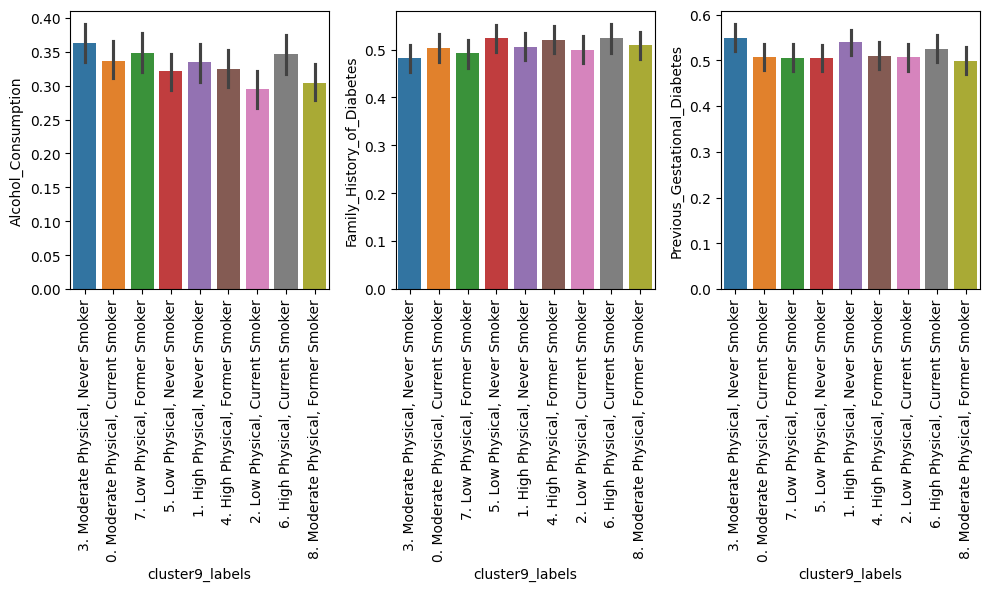

In [103]:
cols=['Alcohol_Consumption','Family_History_of_Diabetes','Previous_Gestational_Diabetes']
plt.figure(figsize=(10,6))
for n,col in enumerate(cols,1):
    plt.subplot(1,3,n)
    sns.barplot(data=df,x="cluster9_labels",y=col,hue="cluster9_labels")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation**
* For the most features, it's distributed evenly among the clusters except alcoho consumption, family history of diabetes, and previous gestational diabetes.
* However, there is no pattern or connection between those clusters and features.

#### Part 3: Conclusions & Recommendations

* Many never smokers and people with high or moderate physical levels had became diabetic. Most of the metrics have similar distribution for each cluster. However, no smoking and high physical activities do have a positive impact on weights, choleterols and blood pressures.
* For people with low physical activity level and current smokers such as cluster 2. They need to smoke less and start do some exercies.
* For people with low physical acitivity such as cluster 7 and 5, they need to beef up their activities.
* for people who smoke currently such as cluster 0 and 6, they need to cut back smoking.
* For people with lots of alcohol consumptions such as cluster 3, 6, and 7, they need to cut it back.

**The End**